# Investigación corta #2. 
MÉTODOS DE APRENDIZAJE SUPERVISADO  

David Martinez Garcia.
Maestria en electrónica ITCR.


# Selección y preprocesado de los datos.

Debido a que la investigación se utilizó un set de datos en el cual no hay claridad de si es un set de datos para regresión o clasificación se busco un nuevo set de datos. 

En este caso, se propone el siguiente set: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Este set de datos corresponde a un set de datos que clasifica individuos y sus respectivos electrocardiogramas en 16 categorias. La categoria 1 corresponde a normal, la categoria 2-15 corresponde a un tipo de arritmia y la categoria 16 corresponde a otro tipo de patología.

Procederemos a cargar el set de datos al notebook.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
arrhythmia_data = pd.read_csv("arrhythmia.data", header=None)

Veamos las primeras lineas:

In [2]:
arrhythmia_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


En primer lugar podemos notar que los nombres de las columnas no existen y ademas que hay algunos valores deconocidos. "?"


In [3]:
names = ["Age","Sex","Height","Weight","QRS duration","P-R interval","Q-T interval","T interval","P intervaL","QRS","T","P","QRST","J","Heart rate","Q wave","R wave","S wave","R' wave","S' wave","Number of intrinsic deflections","Existence of ragged R wave","Existence of diphasic derivation of R wave","Existence of ragged P wavel","Existence of diphasic derivation of P wave","Existence of ragged T wave","Existence of diphasic derivation of T wave","DII_0","DII_1","DII_2","DII_3","DII_4","DII_5","DII_6","DII_7","DII_8","DII_9","DII_10","DII_11","DIII_0","DIII_1","DIII_2","DIII_3","DIII_4","DIII_5","DIII_6","DIII_7","DIII_8","DIII_9","DIII_10","DIII_11","AVR_0","AVR_1","AVR_2","AVR_3","AVR_4","AVR_5","AVR_6","AVR_7","AVR_8","AVR_9","AVR_10","AVR_11","AVL_0","AVL_1","AVL_2","AVL_3","AVL_4","AVL_5","AVL_6","AVL_7","AVL_8","AVL_9","AVL_10","AVL_11","AVF_0","AVF_1","AVF_2","AVF_3","AVF_4","AVF_5","AVF_6","AVF_7","AVF_8","AVF_9","AVF_10","AVF_11","V1_0","V1_1","V1_2","V1_3","V1_4","V1_5","V1_6","V1_7","V1_8","V1_9","V1_10","V1_11","V2_0","V2_1","V2_2","V2_3","V2_4","V2_5","V2_6","V2_7","V2_8","V2_9","V2_10","V2_11","V3_0","V3_1","V3_2","V3_3","V3_4","V3_5","V3_6","V3_7","V3_8","V3_9","V3_10","V3_11","V4_0","V4_1","V4_2","V4_3","V4_4","V4_5","V4_6","V4_7","V4_8","V4_9","V4_10","V4_11","V5_0","V5_1","V5_2","V5_3","V5_4","V5_5","V5_6","V5_7","V5_8","V5_9","V5_10","V5_11","V6_0","V6_1","V6_2","V6_3","V6_4","V6_5","V6_6","V6_7","V6_8","V6_9","V6_10","V6_11","JJ wave","Q wave","R wave","S wave","R' wave","S' wave","P wave","T wave","QRSA","QRSTA","DII_12","DII_13","DII_14","DII_15","DII_16","DII_17","DII_18","DII_19","DII_20","DII_21","DIII_12","DIII_13","DIII_14","DIII_15","DIII_16","DIII_17","DIII_18","DIII_19","DIII_20","DIII_21","AVR_12","AVR_13","AVR_14","AVR_15","AVR_16","AVR_17","AVR_18","AVR_19","AVR_20","AVR_21","AVL_12","AVL_13","AVL_14","AVL_15","AVL_16","AVL_17","AVL_18","AVL_19","AVL_20","AVL_21","AVF_12","AVF_13","AVF_14","AVF_15","AVF_16","AVF_17","AVF_18","AVF_19","AVF_20","AVF_21","V1_12","V1_13","V1_14","V1_15","V1_16","V1_17","V1_18","V1_19","V1_20","V1_21","V2_12","V2_13","V2_14","V2_15","V2_16","V2_17","V2_18","V2_19","V2_20","V2_21","V3_12","V3_13","V3_14","V3_15","V3_16","V3_17","V3_18","V3_19","V3_20","V3_21","V4_12","V4_13","V4_14","V4_15","V4_16","V4_17","V4_18","V4_19","V4_20","V4_21","V5_12","V5_13","V5_14","V5_15","V5_16","V5_17","V5_18","V5_19","V5_20","V5_21","V6_12","V6_13","V6_14","V6_15","V6_16","V6_17","V6_18","V6_19","V6_20","V6_21", "Class"]
arrhythmia_data.columns = names
arrhythmia_data.head()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P intervaL,QRS,T,P,QRST,J,Heart rate,Q wave,R wave,S wave,R' wave,S' wave,Number of intrinsic deflections,Existence of ragged R wave,Existence of diphasic derivation of R wave,Existence of ragged P wavel,Existence of diphasic derivation of P wave,Existence of ragged T wave,Existence of diphasic derivation of T wave,DII_0,DII_1,DII_2,DII_3,DII_4,DII_5,DII_6,DII_7,DII_8,DII_9,DII_10,DII_11,DIII_0,...,V3_13,V3_14,V3_15,V3_16,V3_17,V3_18,V3_19,V3_20,V3_21,V4_12,V4_13,V4_14,V4_15,V4_16,V4_17,V4_18,V4_19,V4_20,V4_21,V5_12,V5_13,V5_14,V5_15,V5_16,V5_17,V5_18,V5_19,V5_20,V5_21,V6_12,V6_13,V6_14,V6_15,V6_16,V6_17,V6_18,V6_19,V6_20,V6_21,Class
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


Veamos un resumen de lo que tenemos

In [4]:
arrhythmia_data['Heart rate'].describe()

count     452
unique     64
top        72
freq       21
Name: Heart rate, dtype: object

Convirtamos el set de datos a numerico.

In [5]:
arrhythmia_data_numeric = arrhythmia_data.apply(pd.to_numeric, errors='coerce')

Se puede evidenciar que para algunos valores (J, por ejemplo), existen valores NaN, se obtendrá la cantidad de valores NaN por columna para saber si estadisticamente es mejor eliminar alguna de esas columnas. Por ejemplo, en el caso de J tenemos que de 452, 376 son NaN.

In [6]:
arrhythmia_data_numeric.isna().sum()[0:15]

Age               0
Sex               0
Height            0
Weight            0
QRS duration      0
P-R interval      0
Q-T interval      0
T interval        0
P intervaL        0
QRS               0
T                 8
P                22
QRST              1
J               376
Heart rate        1
dtype: int64

Se plantea entonces eliminar las columnas cuyos datos tenga mas de 1/3 parte de NaN.

In [7]:
arrhythmia_data_numeric = arrhythmia_data_numeric.loc[:, (arrhythmia_data_numeric.isnull().sum(axis=0) <= len(arrhythmia_data_numeric.index)/3 )]
arrhythmia_data_numeric.head()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P intervaL,QRS,T,P,QRST,Heart rate,Q wave,R wave,S wave,R' wave,S' wave,Number of intrinsic deflections,Existence of ragged R wave,Existence of diphasic derivation of R wave,Existence of ragged P wavel,Existence of diphasic derivation of P wave,Existence of ragged T wave,Existence of diphasic derivation of T wave,DII_0,DII_1,DII_2,DII_3,DII_4,DII_5,DII_6,DII_7,DII_8,DII_9,DII_10,DII_11,DIII_0,DIII_1,...,V3_13,V3_14,V3_15,V3_16,V3_17,V3_18,V3_19,V3_20,V3_21,V4_12,V4_13,V4_14,V4_15,V4_16,V4_17,V4_18,V4_19,V4_20,V4_21,V5_12,V5_13,V5_14,V5_15,V5_16,V5_17,V5_18,V5_19,V5_20,V5_21,V6_12,V6_13,V6_14,V6_15,V6_16,V6_17,V6_18,V6_19,V6_20,V6_21,Class
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,63.0,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,53.0,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,75.0,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,71.0,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,NaN,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,36,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


Solo la columna J poseeía el desbalance de NaN Veamos cual es el maximo de NaN ahora:

In [8]:
arrhythmia_data_numeric.isna().sum().describe()


count    279.000000
mean       0.114695
std        1.401861
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       22.000000
dtype: float64

El maximo corresponde a 22, o sea un 4.79% de los datos. Se considera que eso esta bien como para poder tratarlos de alguna otra manera. Veamos cuales categorias corresponden a los datos faltantes.

In [9]:
arrhythmia_data_numeric.head()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P intervaL,QRS,T,P,QRST,Heart rate,Q wave,R wave,S wave,R' wave,S' wave,Number of intrinsic deflections,Existence of ragged R wave,Existence of diphasic derivation of R wave,Existence of ragged P wavel,Existence of diphasic derivation of P wave,Existence of ragged T wave,Existence of diphasic derivation of T wave,DII_0,DII_1,DII_2,DII_3,DII_4,DII_5,DII_6,DII_7,DII_8,DII_9,DII_10,DII_11,DIII_0,DIII_1,...,V3_13,V3_14,V3_15,V3_16,V3_17,V3_18,V3_19,V3_20,V3_21,V4_12,V4_13,V4_14,V4_15,V4_16,V4_17,V4_18,V4_19,V4_20,V4_21,V5_12,V5_13,V5_14,V5_15,V5_16,V5_17,V5_18,V5_19,V5_20,V5_21,V6_12,V6_13,V6_14,V6_15,V6_16,V6_17,V6_18,V6_19,V6_20,V6_21,Class
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,63.0,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,53.0,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,75.0,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,71.0,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,NaN,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,36,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [10]:
na_data = arrhythmia_data_numeric.loc[:, arrhythmia_data_numeric.isna().any()]


In [11]:
na_data

,T,P,QRST,Heart rate
0,13.0,64.0,-2.0,63.0
1,37.0,-17.0,31.0,53.0
2,34.0,70.0,66.0,75.0
3,11.0,-5.0,20.0,71.0
4,13.0,61.0,3.0,NaN
...,...,...,...,...
447,4.0,40.0,-27.0,63.0
448,66.0,52.0,79.0,73.0
449,-19.0,-61.0,-70.0,84.0
450,29.0,-22.0,43.0,80.0


Son solo 4 columnas, por lo podemos hacer estrategiasd para cada una de ellas. Comencemos por describirlas estadisticamente:

In [12]:
print("Mean: ")
print(na_data.mean())
print("")
print("Median: ")
print(na_data.median())


Mean: 
T             36.150901
P             48.913953
QRST          36.716186
Heart rate    74.463415
dtype: float64

Median: 
T             41.0
P             56.0
QRST          40.0
Heart rate    72.0
dtype: float64


Los datos faltantes no parecen ser afectados por altos outliers. Dado que su media y su mediana son bastante similares. Es por esto que se cambiaran los datos faltantes por el promedio de la columna.

Por alguna razon, los commandos fillna(arrhythmia_data_numeric.mean(), inplace=True) no funcionaron. Se utilizo el comando: .replace(np.nan, arrhythmia_data_numeric.mean()) y finalmente si funcionó.

In [13]:
arrhythmia_data_numeric.fillna(arrhythmia_data_numeric.mean(), inplace=True)



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [14]:
arrhythmia_data_numeric

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P intervaL,QRS,T,P,QRST,Heart rate,Q wave,R wave,S wave,R' wave,S' wave,Number of intrinsic deflections,Existence of ragged R wave,Existence of diphasic derivation of R wave,Existence of ragged P wavel,Existence of diphasic derivation of P wave,Existence of ragged T wave,Existence of diphasic derivation of T wave,DII_0,DII_1,DII_2,DII_3,DII_4,DII_5,DII_6,DII_7,DII_8,DII_9,DII_10,DII_11,DIII_0,DIII_1,...,V3_13,V3_14,V3_15,V3_16,V3_17,V3_18,V3_19,V3_20,V3_21,V4_12,V4_13,V4_14,V4_15,V4_16,V4_17,V4_18,V4_19,V4_20,V4_21,V5_12,V5_13,V5_14,V5_15,V5_16,V5_17,V5_18,V5_19,V5_20,V5_21,V6_12,V6_13,V6_14,V6_15,V6_16,V6_17,V6_18,V6_19,V6_20,V6_21,Class
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,63.0,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,53.0,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,75.0,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,71.0,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,NaN,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,36,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4.0,40.0,-27.0,63.0,0,52,24,0,0,28,0,0,0,0,0,0,0,44,40,0,0,32,0,0,0,0,0,0,0,24,...,0.0,1.3,-9.2,0.0,0.0,-0.1,2.2,-22.1,3.8,0.2,0.0,2.9,-10.3,0.0,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0.0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66.0,52.0,79.0,73.0,0,44,36,0,0,24,0,0,0,0,0,0,0,56,0,0,0,32,0,0,0,0,0,0,0,76,...,0.0,12.2,-5.4,0.0,0.0,-0.3,10.8,27.7,137.8,0.1,0.0,22.5,-3.5,0.9,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0.0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,-19.0,-61.0,-70.0,84.0,16,40,40,0,0,40,0,0,0,0,0,0,0,40,56,0,0,32,0,0,0,0,0,0,0,28,...,0.0,18.3,-34.1,0.0,0.0,1.4,-8.2,-75.7,-146.2,-0.4,0.0,20.6,-36.7,0.0,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0.0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,29.0,-22.0,43.0,80.0,0,56,0,0,0,32,0,0,0,0,0,0,16,64,0,0,0,40,0,0,0,0,0,0,16,60,...,0.0,8.8,-7.7,0.0,0.0,0.9,7.3,3.9,94.4,0.4,0.0,11.9,-6.7,0.0,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0.0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [15]:
arrhythmia_data_numeric = arrhythmia_data_numeric.replace(np.nan, arrhythmia_data_numeric.mean())

Realicemos una copia de los datos para poder utilizarlos mas adelante.

In [16]:
arrhythmia_data_copy = arrhythmia_data_numeric.copy()

In [17]:
arrhythmia_data_numeric

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P intervaL,QRS,T,P,QRST,Heart rate,Q wave,R wave,S wave,R' wave,S' wave,Number of intrinsic deflections,Existence of ragged R wave,Existence of diphasic derivation of R wave,Existence of ragged P wavel,Existence of diphasic derivation of P wave,Existence of ragged T wave,Existence of diphasic derivation of T wave,DII_0,DII_1,DII_2,DII_3,DII_4,DII_5,DII_6,DII_7,DII_8,DII_9,DII_10,DII_11,DIII_0,DIII_1,...,V3_13,V3_14,V3_15,V3_16,V3_17,V3_18,V3_19,V3_20,V3_21,V4_12,V4_13,V4_14,V4_15,V4_16,V4_17,V4_18,V4_19,V4_20,V4_21,V5_12,V5_13,V5_14,V5_15,V5_16,V5_17,V5_18,V5_19,V5_20,V5_21,V6_12,V6_13,V6_14,V6_15,V6_16,V6_17,V6_18,V6_19,V6_20,V6_21,Class
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,63.000000,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,53.000000,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,75.000000,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,71.000000,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,74.463415,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,36,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4.0,40.0,-27.0,63.000000,0,52,24,0,0,28,0,0,0,0,0,0,0,44,40,0,0,32,0,0,0,0,0,0,0,24,...,0.0,1.3,-9.2,0.0,0.0,-0.1,2.2,-22.1,3.8,0.2,0.0,2.9,-10.3,0.0,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0.0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66.0,52.0,79.0,73.000000,0,44,36,0,0,24,0,0,0,0,0,0,0,56,0,0,0,32,0,0,0,0,0,0,0,76,...,0.0,12.2,-5.4,0.0,0.0,-0.3,10.8,27.7,137.8,0.1,0.0,22.5,-3.5,0.9,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0.0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,-19.0,-61.0,-70.0,84.000000,16,40,40,0,0,40,0,0,0,0,0,0,0,40,56,0,0,32,0,0,0,0,0,0,0,28,...,0.0,18.3,-34.1,0.0,0.0,1.4,-8.2,-75.7,-146.2,-0.4,0.0,20.6,-36.7,0.0,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0.0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,29.0,-22.0,43.0,80.000000,0,56,0,0,0,32,0,0,0,0,0,0,16,64,0,0,0,40,0,0,0,0,0,0,16,60,...,0.0,8.8,-7.7,0.0,0.0,0.9,7.3,3.9,94.4,0.4,0.0,11.9,-6.7,0.0,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0.0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


Estudiemos los valores Outliers


In [18]:
arrhythmia_data_numeric.describe()


,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P intervaL,QRS,T,P,QRST,Heart rate,Q wave,R wave,S wave,R' wave,S' wave,Number of intrinsic deflections,Existence of ragged R wave,Existence of diphasic derivation of R wave,Existence of ragged P wavel,Existence of diphasic derivation of P wave,Existence of ragged T wave,Existence of diphasic derivation of T wave,DII_0,DII_1,DII_2,DII_3,DII_4,DII_5,DII_6,DII_7,DII_8,DII_9,DII_10,DII_11,DIII_0,DIII_1,...,V3_13,V3_14,V3_15,V3_16,V3_17,V3_18,V3_19,V3_20,V3_21,V4_12,V4_13,V4_14,V4_15,V4_16,V4_17,V4_18,V4_19,V4_20,V4_21,V5_12,V5_13,V5_14,V5_15,V5_16,V5_17,V5_18,V5_19,V5_20,V5_21,V6_12,V6_13,V6_14,V6_15,V6_16,V6_17,V6_18,V6_19,V6_20,V6_21,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,36.150901,48.913953,36.716186,74.463415,5.628319,51.628319,20.920354,0.141593,0.0,30.035398,0.002212,0.011062,0.011062,0.004425,0.004425,0.008850,5.619469,54.336283,20.59292,0.433628,0.150442,31.637168,0.017699,0.028761,0.002212,0.004425,0.004425,0.015487,16.026549,41.982301,...,-0.653540,8.039602,-10.150664,0.032965,-0.013496,0.226770,3.894690,-8.269027,32.422788,0.001106,-0.297566,11.839381,-7.034513,0.025664,-0.002876,0.547788,2.535841,10.081195,33.328540,-0.285398,-0.277212,11.369912,-3.607522,0.016814,0.0,0.546681,1.722124,17.840044,32.871460,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,57.342803,28.621694,35.980768,13.855298,10.650001,18.249901,20.541728,1.569483,0.0,10.046393,0.047036,0.104708,0.104708,0.066445,0.066445,0.093759,11.220680,17.248213,21.06105,3.093161,2.692591,9.624951,0.132002,0.167319,0.047036,0.066445,0.066445,0.123615,21.906457,23.106034,...,3.414085,5.279719,7.066568,0.390403,0.264398,0.548988,2.990809,32.157008,37.362289,1.015566,1.758544,5.917391,5.061472,0.166763,0.046287,0.426941,2.429776,25.074695,34.361665,0.675060,0.992472,4.793656,2.850633,0.275907,0.0,0.370548,1.708190,16.445472,24.421643,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,-170.000000,-135.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-32.900000,0.000000,-48.400000,0.000000,-5.600000,-3.100000,-11.800000,-242.400000,-146.200000,-3.200000,-20.400000,0.000000,-42.900000,0.000000,-0.900000,-2.600000,-8.200000,-124.800000,-161.400000,-4.800000,-14.200000,0.000000,-30.800000,0.000000,0.0,-0.900000,-5.000000,-56.800000,-63.600000,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,14.000000,41.000

Dado que se tienen 279 columnas será imposible identificar como se relacionan unas variables con otras a nivel visual. Sin embargo, con una simple inspeccion a los valores podemos notar que hay algunos que estan erroneos. Por ejemplo, El valor de Height (Altura) tiene un valor maximo de 780 cm, lo cual sabemos que es imposible para un humano. 

Filtraremos los datos por medio de una aproximación de media mas dos desviaciones estandar. Escribiendo la media como parámetro.

In [21]:
mask = (arrhythmia_data_numeric > arrhythmia_data_numeric.mean() + 2*arrhythmia_data_numeric.std()) | (arrhythmia_data_numeric < arrhythmia_data_numeric.mean() - 2*arrhythmia_data_numeric.std())
arrhythmia_data_numeric.mask(mask, arrhythmia_data_numeric.mean(), axis =1).describe()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P intervaL,QRS,T,P,QRST,Heart rate,Q wave,R wave,S wave,R' wave,S' wave,Number of intrinsic deflections,Existence of ragged R wave,Existence of diphasic derivation of R wave,Existence of ragged P wavel,Existence of diphasic derivation of P wave,Existence of ragged T wave,Existence of diphasic derivation of T wave,DII_0,DII_1,DII_2,DII_3,DII_4,DII_5,DII_6,DII_7,DII_8,DII_9,DII_10,DII_11,DIII_0,DIII_1,...,V3_13,V3_14,V3_15,V3_16,V3_17,V3_18,V3_19,V3_20,V3_21,V4_12,V4_13,V4_14,V4_15,V4_16,V4_17,V4_18,V4_19,V4_20,V4_21,V5_12,V5_13,V5_14,V5_15,V5_16,V5_17,V5_18,V5_19,V5_20,V5_21,V6_12,V6_13,V6_14,V6_15,V6_16,V6_17,V6_18,V6_19,V6_20,V6_21,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,47.623664,0.550885,163.852602,68.858226,86.861873,158.791629,367.800033,163.793195,90.175043,35.747416,41.644553,51.624558,38.221955,73.112562,4.630903,49.853277,19.781424,0.001253,0.0,29.390634,0.000005,0.000122,0.000122,0.000020,0.000020,0.000078,4.416575,52.988331,19.192732,0.009594,0.000666,31.094976,0.000313,0.000827,0.000005,0.000020,0.000020,0.000240,12.435273,40.658861,...,-0.093591,7.347503,-9.354224,0.001471,-0.001136,0.252188,3.838470,-4.748118,32.706842,-0.072090,-0.098414,11.429303,-6.392227,0.000852,-0.000013,0.583973,2.531532,11.839350,32.515043,-0.283457,-0.183718,10.953115,-3.300488,0.004020,0.0,0.569352,1.762432,18.166374,32.139698,-0.284821,-0.197568,8.812744,-1.294946,0.000026,0.0,0.541380,1.319869,18.920682,29.152975,3.078090
std,14.211193,0.497955,10.390252,12.195902,9.655112,22.440778,24.491994,24.154760,15.928273,37.981980,36.079697,18.588722,29.351932,10.911728,8.268037,12.483900,18.987385,0.013276,0.0,7.619583,0.000104,0.001158,0.001158,0.000294,0.000294,0.000830,8.628435,13.568227,19.118353,0.063852,0.009996,7.479917,0.002336,0.004812,0.000104,0.000294,0.000294,0.001914,15.902163,21.418800,...,0.576782,4.136269,5.186761,0.023753,0.023525,0.432096,2.266041,19.849587,29.128155,0.650415,0.349539,4.786010,3.513896,0.004602,0.000191,0.293758,1.929321,17.529215,27.867994,0.446371,0.396805,3.894200,2.117231,0.042457,0.0,0.246499,1.289934,12.981353,19.859730,0.397570,0.333748,2.922850,1.264859,0.000324,0.0,0.232567,1.084049,10.321392,15.404558,3.055031
min,14.000000,0.000000,105.000000,38.000000,61.000000,103.000000,301.000000,108.000000,39.000000,-57.000000,-76.000000,-8.000000,-32.000000,49.000000,0.000000,16.000000,0.000000,0.000000,0.0,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.800000,0.000000,-23.800000,0.000000,-0.500000,-0.800000,-1.600000,-66.900000,-36.900000,-2.000000,-3.100000,0.500000,-16.100000,0.000000,-0.002876,-0.300000,-2.300000,-39.100000,-33.000000,-1.600000,-2.000000,1.900000,-9.300000,0.000000,0.0,-0.100000,-1.500000,-14.600000,-14.100000,-1.500000,-1.300000,2.200000,-5.400000,0.000000,0.0,-0.100000,-1.600000,-7.200000,-6.300000,1.000000
25%,37.000000,0.000000,160.000000,60.000000,80.000000,145.000000,353.000000,148.000000,80.000000,8.750000,19.000000,44.000000,16.7

Normalizemos ahora los datos para ser utilizados por los *algoritmos*

In [22]:
arrhythmia_data_norm = (arrhythmia_data_numeric - arrhythmia_data_numeric.min()) / (arrhythmia_data_numeric.max() - arrhythmia_data_numeric.min())
arrhythmia_data_norm

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P intervaL,QRS,T,P,QRST,Heart rate,Q wave,R wave,S wave,R' wave,S' wave,Number of intrinsic deflections,Existence of ragged R wave,Existence of diphasic derivation of R wave,Existence of ragged P wavel,Existence of diphasic derivation of P wave,Existence of ragged T wave,Existence of diphasic derivation of T wave,DII_0,DII_1,DII_2,DII_3,DII_4,DII_5,DII_6,DII_7,DII_8,DII_9,DII_10,DII_11,DIII_0,DIII_1,...,V3_13,V3_14,V3_15,V3_16,V3_17,V3_18,V3_19,V3_20,V3_21,V4_12,V4_13,V4_14,V4_15,V4_16,V4_17,V4_18,V4_19,V4_20,V4_21,V5_12,V5_13,V5_14,V5_15,V5_16,V5_17,V5_18,V5_19,V5_20,V5_21,V6_12,V6_13,V6_14,V6_15,V6_16,V6_17,V6_18,V6_19,V6_20,V6_21,Class
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,0.533708,0.676301,0.441860,0.159664,0.000000,0.333333,0.500000,0.0,NaN,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.217391,1.0,0.0,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.565217,0.344828,...,1.0,0.295775,0.793388,0.000000,1.000000,0.660714,0.578431,0.584846,0.700352,0.224806,1.0,0.417582,0.804196,0.000,1.0,0.648148,0.558824,0.624452,0.675298,0.536585,1.0,0.457627,0.870130,0.0,NaN,0.486486,0.669173,0.592513,0.660574,0.638554,1.000000,0.381356,0.968531,0.0,NaN,0.53125,0.741667,0.507519,0.569579,0.466667
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,0.601124,0.442197,0.551495,0.075630,0.000000,0.307692,0.000000,0.0,NaN,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.484848,0.000000,0.0,0.0,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.347826,0.206897,...,1.0,0.204225,0.840909,0.000000,1.000000,0.714286,0.509804,0.580432,0.612324,0.232558,1.0,0.260989,0.883450,0.000,1.0,0.574074,0.453782,0.598598,0.570265,0.536585,1.0,0.372881,0.922078,0.0,NaN,0.351351,0.571429,0.564435,0.558747,0.614458,1.000000,0.360169,1.000000,0.0,NaN,0.31250,0.675000,0.485714,0.500971,0.333333
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,0.592697,0.693642,0.667774,0.260504,0.000000,0.256410,0.909091,0.0,NaN,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.263158,0.424242,0.565217,0.0,0.0,0.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.304348,1.000000,...,1.0,0.204225,0.915289,0.571429,0.910714,0.625000,0.395425,0.644434,0.596831,0.302326,1.0,0.274725,0.867133,0.000,1.0,0.574074,0.436975,0.533742,0.529823,0.743902,1.0,0.376271,0.889610,0.0,NaN,0.351351,0.631579,0.491721,0.583812,0.783133,1.000000,0.402542,0.916084,0.0,NaN,0.34375,0.783333,0.424812,0.566990,0.600000
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,0.528090,0.476879,0.514950,0.226891,0.000000,0.461538,0.227273,0.0,NaN,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.484848,0.391304,0.0,0.0,0.473684,0.0,0.0,0.0,0.0,0.0,0.0,0.217391,0.448276,...,1.0,0.316901,0.836777,0.000000,1.000000,0.571429,0.519608,0.613046,0.694366,0.279070,1.0,0.412088,0.871795,0.000,1.0,0.500000,0.483193,0.673094,0.653186,0.597561,1.0,0.515254,0.879870,0.0,NaN,0.405405,0.601504,0.673866,0.687206,0.686747,1.000000,0.516949,0.923077,0.0,NaN,0.37500,0.716667,0.592481,0.648544,0.000000
4,0.903614,0.0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,0.533708,0.667630,0.458472,0.255995,0.000000,0.307692,0.454545,0.0,NaN,0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.303030,0.260870,0.0,0.0,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.565217,0.310345,...,1.0,0.299296,0.789256,0.000000,1.000000,0.375000,0.539216,0.584600,0.666197,0.232558,1.0,0.417582,0.818182,0.000,1.0,0.462963,0.550420,0.617879,0.653477,0.560976,1.0,0.308475,0.970779,0.0,NaN,0.189189,0.593985,0.565155,0.587467,0.626506,1.000000,0.555085,0.874126,0.0,NaN,0.21875,0.825000,0.523308,0.656311,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Podemos notar que algunos de los datos promediados eran nominales (0 o 1). Devolvamos estos valores a sus originales. 

In [27]:
arrhythmia_data_norm['Sex'] = arrhythmia_data['Sex']
arrhythmia_data_norm.iloc[:,20:26] = arrhythmia_data_copy.iloc[:,20:26]
arrhythmia_data_norm.iloc[:,32:38] = arrhythmia_data_copy.iloc[:,32:38]
arrhythmia_data_norm.iloc[:,64:50] = arrhythmia_data_copy.iloc[:,64:50] 
arrhythmia_data_norm.iloc[:,56:62] = arrhythmia_data_copy.iloc[:,56:62]
arrhythmia_data_norm.iloc[:,68:74] = arrhythmia_data_copy.iloc[:,68:74]
arrhythmia_data_norm.iloc[:,80:86] = arrhythmia_data_copy.iloc[:,80:86]
arrhythmia_data_norm.iloc[:,92:98] = arrhythmia_data_copy.iloc[:,92:98]
arrhythmia_data_norm.iloc[:,104:110] = arrhythmia_data_copy.iloc[:,104:110] 
arrhythmia_data_norm.iloc[:,116:122] = arrhythmia_data_copy.iloc[:,116:122]
arrhythmia_data_norm.iloc[:,128:134] = arrhythmia_data_copy.iloc[:,128:134]
arrhythmia_data_norm.iloc[:,140:146] = arrhythmia_data_copy.iloc[:,140:146]
arrhythmia_data_norm.iloc[:,152:158] = arrhythmia_data_copy.iloc[:,152:158]
arrhythmia_data_norm['Class'] = arrhythmia_data['Class']
arrhythmia_data_norm['Class']

0       8
1       6
2      10
3       1
4       7
       ..
447     1
448    10
449     2
450     1
451     1
Name: Class, Length: 452, dtype: int64

Las columnas NaN que aparecen son debido a que toda la columna poseia unicamente valores 0. Veamos cuales son:

In [30]:
arrhythmia_data_norm.loc[:, arrhythmia_data_norm.isna().any()]

,S' wave,AVL_4,V5_4,V6_4,S' wave,AVL_17,V5_17,V6_17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Guardemos las columnas en un vector de columnas para eliminarlas del modelo

In [35]:
empty_columns = arrhythmia_data_norm.loc[:, arrhythmia_data_norm.isna().any()].columns
arrhythmia_data_norm.drop(columns=empty_columns, inplace=True)
arrhythmia_data_norm

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P intervaL,QRS,T,P,QRST,Heart rate,Q wave,R wave,S wave,R' wave,Number of intrinsic deflections,Existence of ragged R wave,Existence of diphasic derivation of R wave,Existence of ragged P wavel,Existence of diphasic derivation of P wave,Existence of ragged T wave,Existence of diphasic derivation of T wave,DII_0,DII_1,DII_2,DII_3,DII_4,DII_5,DII_6,DII_7,DII_8,DII_9,DII_10,DII_11,DIII_0,DIII_1,DIII_2,...,V2_21,V3_12,V3_13,V3_14,V3_15,V3_16,V3_17,V3_18,V3_19,V3_20,V3_21,V4_12,V4_13,V4_14,V4_15,V4_16,V4_17,V4_18,V4_19,V4_20,V4_21,V5_12,V5_13,V5_14,V5_15,V5_16,V5_18,V5_19,V5_20,V5_21,V6_12,V6_13,V6_14,V6_15,V6_16,V6_18,V6_19,V6_20,V6_21,Class
0,0.903614,0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,0.533708,0.676301,0.441860,0.159664,0.000000,0.333333,0.500000,0.0,0.32,0,0,0,0,0,0,0.000000,0.333333,0.217391,1.0,0.0,0.368421,0,0,0,0,0,0,0.565217,0.344828,0.000000,...,0.504344,0.173913,1.0,0.295775,0.793388,0.000000,1.000000,0.660714,0.578431,0.584846,0.700352,0.224806,1.0,0.417582,0.804196,0.000,1.0,0.648148,0.558824,0.624452,0.675298,0.536585,1.0,0.457627,0.870130,0.0,0.486486,0.669173,0.592513,0.660574,0.638554,1.000000,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579,8
1,0.674699,1,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,0.601124,0.442197,0.551495,0.075630,0.000000,0.307692,0.000000,0.0,0.24,0,0,0,0,0,0,0.000000,0.484848,0.000000,0.0,0.0,0.315789,0,0,0,0,0,0,0.347826,0.206897,0.000000,...,0.440329,0.179348,1.0,0.204225,0.840909,0.000000,1.000000,0.714286,0.509804,0.580432,0.612324,0.232558,1.0,0.260989,0.883450,0.000,1.0,0.574074,0.453782,0.598598,0.570265,0.536585,1.0,0.372881,0.922078,0.0,0.351351,0.571429,0.564435,0.558747,0.614458,1.000000,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971,6
2,0.650602,0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,0.592697,0.693642,0.667774,0.260504,0.000000,0.256410,0.909091,0.0,0.24,0,0,0,0,0,0,0.263158,0.424242,0.565217,0.0,0.0,0.526316,0,0,0,0,0,0,0.304348,1.000000,0.000000,...,0.422954,0.179348,1.0,0.204225,0.915289,0.571429,0.910714,0.625000,0.395425,0.644434,0.596831,0.302326,1.0,0.274725,0.867133,0.000,1.0,0.574074,0.436975,0.533742,0.529823,0.743902,1.0,0.376271,0.889610,0.0,0.351351,0.631579,0.491721,0.583812,0.783133,1.000000,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990,10
3,0.662651,0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,0.528090,0.476879,0.514950,0.226891,0.000000,0.461538,0.227273,0.0,0.48,0,0,0,0,0,0,0.000000,0.484848,0.391304,0.0,0.0,0.473684,0,0,0,0,0,0,0.217391,0.448276,0.363636,...,0.517147,0.217391,1.0,0.316901,0.836777,0.000000,1.000000,0.571429,0.519608,0.613046,0.694366,0.279070,1.0,0.412088,0.871795,0.000,1.0,0.500000,0.483193,0.673094,0.653186,0.597561,1.0,0.515254,0.879870,0.0,0.405405,0.601504,0.673866,0.687206,0.686747,1.000000,0.516949,0.923077,0.0,0.37500,0.716667,0.592481,0.648544,1
4,0.903614,0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,0.533708,0.667630,0.458472,0.255995,0.000000,0.307692,0.454545,0.0,0.28,0,0,0,0,0,0,0.000000,0.303030,0.260870,0.0,0.0,0.315789,0,0,0,0,0,0,0.565217,0.310345,0.000000,...,0.474166,0.152174,1.0,0.299296,0.789256,0.000000,1.000000,0.375000,0.539216,0.584600,0.666197,0.232558,1.0,0.417582,0.818182,0.000,1.0,0.462963,0.550420,0.617879,0.653477,0.560976,1.0,0.308475,0.970779,0.0,0.189189,0.593985,0.565155,0.587467,0.626506,1.000000,0.555085,0.874126,0.0,0.21875,0.825000,0.523308,0.656311,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,1,0.081481,0.376471,0.187970,0.379771,0.541516,0.168498,0.570732

Debido a que existen muchas clases desbalanceadas, se decide añadir las clases que tienen menos de 6 instancias a la clase others (16) 10. Estas clases corresponden a 7,8,14,15 las clases 11,12 y 13 tambien tienen menos de 6 instancias, pero estan vacias.

In [36]:
arrhythmia_data_norm['Class'].value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: Class, dtype: int64

In [39]:
arrhythmia_data_norm['Class'] = arrhythmia_data_norm['Class'].replace([7,8,14,15,9],16)

In [40]:
arrhythmia_data_norm['Class'].value_counts()

1     245
10     50
16     45
2      44
6      25
4      15
3      15
5      13
Name: Class, dtype: int64

In [41]:
arrhythmia_data_norm

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P intervaL,QRS,T,P,QRST,Heart rate,Q wave,R wave,S wave,R' wave,Number of intrinsic deflections,Existence of ragged R wave,Existence of diphasic derivation of R wave,Existence of ragged P wavel,Existence of diphasic derivation of P wave,Existence of ragged T wave,Existence of diphasic derivation of T wave,DII_0,DII_1,DII_2,DII_3,DII_4,DII_5,DII_6,DII_7,DII_8,DII_9,DII_10,DII_11,DIII_0,DIII_1,DIII_2,...,V2_21,V3_12,V3_13,V3_14,V3_15,V3_16,V3_17,V3_18,V3_19,V3_20,V3_21,V4_12,V4_13,V4_14,V4_15,V4_16,V4_17,V4_18,V4_19,V4_20,V4_21,V5_12,V5_13,V5_14,V5_15,V5_16,V5_18,V5_19,V5_20,V5_21,V6_12,V6_13,V6_14,V6_15,V6_16,V6_18,V6_19,V6_20,V6_21,Class
0,0.903614,0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,0.533708,0.676301,0.441860,0.159664,0.000000,0.333333,0.500000,0.0,0.32,0,0,0,0,0,0,0.000000,0.333333,0.217391,1.0,0.0,0.368421,0,0,0,0,0,0,0.565217,0.344828,0.000000,...,0.504344,0.173913,1.0,0.295775,0.793388,0.000000,1.000000,0.660714,0.578431,0.584846,0.700352,0.224806,1.0,0.417582,0.804196,0.000,1.0,0.648148,0.558824,0.624452,0.675298,0.536585,1.0,0.457627,0.870130,0.0,0.486486,0.669173,0.592513,0.660574,0.638554,1.000000,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579,16
1,0.674699,1,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,0.601124,0.442197,0.551495,0.075630,0.000000,0.307692,0.000000,0.0,0.24,0,0,0,0,0,0,0.000000,0.484848,0.000000,0.0,0.0,0.315789,0,0,0,0,0,0,0.347826,0.206897,0.000000,...,0.440329,0.179348,1.0,0.204225,0.840909,0.000000,1.000000,0.714286,0.509804,0.580432,0.612324,0.232558,1.0,0.260989,0.883450,0.000,1.0,0.574074,0.453782,0.598598,0.570265,0.536585,1.0,0.372881,0.922078,0.0,0.351351,0.571429,0.564435,0.558747,0.614458,1.000000,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971,6
2,0.650602,0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,0.592697,0.693642,0.667774,0.260504,0.000000,0.256410,0.909091,0.0,0.24,0,0,0,0,0,0,0.263158,0.424242,0.565217,0.0,0.0,0.526316,0,0,0,0,0,0,0.304348,1.000000,0.000000,...,0.422954,0.179348,1.0,0.204225,0.915289,0.571429,0.910714,0.625000,0.395425,0.644434,0.596831,0.302326,1.0,0.274725,0.867133,0.000,1.0,0.574074,0.436975,0.533742,0.529823,0.743902,1.0,0.376271,0.889610,0.0,0.351351,0.631579,0.491721,0.583812,0.783133,1.000000,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990,10
3,0.662651,0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,0.528090,0.476879,0.514950,0.226891,0.000000,0.461538,0.227273,0.0,0.48,0,0,0,0,0,0,0.000000,0.484848,0.391304,0.0,0.0,0.473684,0,0,0,0,0,0,0.217391,0.448276,0.363636,...,0.517147,0.217391,1.0,0.316901,0.836777,0.000000,1.000000,0.571429,0.519608,0.613046,0.694366,0.279070,1.0,0.412088,0.871795,0.000,1.0,0.500000,0.483193,0.673094,0.653186,0.597561,1.0,0.515254,0.879870,0.0,0.405405,0.601504,0.673866,0.687206,0.686747,1.000000,0.516949,0.923077,0.0,0.37500,0.716667,0.592481,0.648544,1
4,0.903614,0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,0.533708,0.667630,0.458472,0.255995,0.000000,0.307692,0.454545,0.0,0.28,0,0,0,0,0,0,0.000000,0.303030,0.260870,0.0,0.0,0.315789,0,0,0,0,0,0,0.565217,0.310345,0.000000,...,0.474166,0.152174,1.0,0.299296,0.789256,0.000000,1.000000,0.375000,0.539216,0.584600,0.666197,0.232558,1.0,0.417582,0.818182,0.000,1.0,0.462963,0.550420,0.617879,0.653477,0.560976,1.0,0.308475,0.970779,0.0,0.189189,0.593985,0.565155,0.587467,0.626506,1.000000,0.555085,0.874126,0.0,0.21875,0.825000,0.523308,0.656311,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,1,0.081481,0.376471,0.187970,0.379771,0.541516,0.168498,0.5707

Veamos que la clase 1 posee muchos datos en comparación al resto de las cases. Procederemos a botar unos cuantos

In [42]:
filtering_data = arrhythmia_data_norm[arrhythmia_data_norm['Class'] == 1].sample(180).index
arrhythmia_data_balanced = arrhythmia_data_norm[~arrhythmia_data_norm.index.isin(filtering_data)]
arrhythmia_data_balanced['Class'].value_counts()

1     65
10    50
16    45
2     44
6     25
4     15
3     15
5     13
Name: Class, dtype: int64

In [43]:
arrhythmia_data_balanced

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P intervaL,QRS,T,P,QRST,Heart rate,Q wave,R wave,S wave,R' wave,Number of intrinsic deflections,Existence of ragged R wave,Existence of diphasic derivation of R wave,Existence of ragged P wavel,Existence of diphasic derivation of P wave,Existence of ragged T wave,Existence of diphasic derivation of T wave,DII_0,DII_1,DII_2,DII_3,DII_4,DII_5,DII_6,DII_7,DII_8,DII_9,DII_10,DII_11,DIII_0,DIII_1,DIII_2,...,V2_21,V3_12,V3_13,V3_14,V3_15,V3_16,V3_17,V3_18,V3_19,V3_20,V3_21,V4_12,V4_13,V4_14,V4_15,V4_16,V4_17,V4_18,V4_19,V4_20,V4_21,V5_12,V5_13,V5_14,V5_15,V5_16,V5_18,V5_19,V5_20,V5_21,V6_12,V6_13,V6_14,V6_15,V6_16,V6_18,V6_19,V6_20,V6_21,Class
0,0.903614,0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,0.533708,0.676301,0.441860,0.159664,0.000000,0.333333,0.500000,0.0,0.32,0,0,0,0,0,0,0.000000,0.333333,0.217391,1.0,0.0,0.368421,0,0,0,0,0,0,0.565217,0.344828,0.000000,...,0.504344,0.173913,1.000000,0.295775,0.793388,0.000000,1.000000,0.660714,0.578431,0.584846,0.700352,0.224806,1.0,0.417582,0.804196,0.000,1.0,0.648148,0.558824,0.624452,0.675298,0.536585,1.0,0.457627,0.870130,0.0,0.486486,0.669173,0.592513,0.660574,0.638554,1.000000,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579,16
1,0.674699,1,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,0.601124,0.442197,0.551495,0.075630,0.000000,0.307692,0.000000,0.0,0.24,0,0,0,0,0,0,0.000000,0.484848,0.000000,0.0,0.0,0.315789,0,0,0,0,0,0,0.347826,0.206897,0.000000,...,0.440329,0.179348,1.000000,0.204225,0.840909,0.000000,1.000000,0.714286,0.509804,0.580432,0.612324,0.232558,1.0,0.260989,0.883450,0.000,1.0,0.574074,0.453782,0.598598,0.570265,0.536585,1.0,0.372881,0.922078,0.0,0.351351,0.571429,0.564435,0.558747,0.614458,1.000000,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971,6
2,0.650602,0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,0.592697,0.693642,0.667774,0.260504,0.000000,0.256410,0.909091,0.0,0.24,0,0,0,0,0,0,0.263158,0.424242,0.565217,0.0,0.0,0.526316,0,0,0,0,0,0,0.304348,1.000000,0.000000,...,0.422954,0.179348,1.000000,0.204225,0.915289,0.571429,0.910714,0.625000,0.395425,0.644434,0.596831,0.302326,1.0,0.274725,0.867133,0.000,1.0,0.574074,0.436975,0.533742,0.529823,0.743902,1.0,0.376271,0.889610,0.0,0.351351,0.631579,0.491721,0.583812,0.783133,1.000000,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990,10
4,0.903614,0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,0.533708,0.667630,0.458472,0.255995,0.000000,0.307692,0.454545,0.0,0.28,0,0,0,0,0,0,0.000000,0.303030,0.260870,0.0,0.0,0.315789,0,0,0,0,0,0,0.565217,0.310345,0.000000,...,0.474166,0.152174,1.000000,0.299296,0.789256,0.000000,1.000000,0.375000,0.539216,0.584600,0.666197,0.232558,1.0,0.417582,0.818182,0.000,1.0,0.462963,0.550420,0.617879,0.653477,0.560976,1.0,0.308475,0.970779,0.0,0.189189,0.593985,0.565155,0.587467,0.626506,1.000000,0.555085,0.874126,0.0,0.21875,0.825000,0.523308,0.656311,16
5,0.156627,0,0.094815,0.264706,0.338346,0.318702,0.321300,0.241758,0.443902,0.818182,0.682584,0.641618,0.740864,0.336134,0.000000,0.230769,0.545455,0.0,0.20,0,0,0,0,0,0,0.263158,0.333333,0.391304,0.0,0.0,0.578947,0,0,0,0,0,0,0.260870,0.551724,0.000000,...,0.000000,0.288043,0.975684,0.697183,0.000000,0.000000,1.000000,0.839286,0.669935,0.313634,0.258451,0.403101,1.0,0.851648,0.400932,0.000,1.0,0.629630,0.592437,0.674847,0.719232,0.658537,1.0,0.661017,0.629870,0.0,0.459459,0.624060,0.553636,0.588512,0.674699,0.853659,0.516949,0.902098,0.0,0.53125,0.683333,0.433835,0.451133,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0.349398,0,0.090370,0.335294,0.195489,0.27290

# Metricas para evaluar modelos de regresion y clasificacion.

En primer lugar hay que notar que nuestros modelos de clasificación serán multiclase (tenemos 16 clases distintas). 

A continuacion se presentan distintas métricas para evaluar modelos de clasificación multiclase (Dado la naturaleza de nuestro modelo). Los ejemplos y definiciones se encuentran en scikit-learn.org

## Balanced Acuracy


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score

> Calcula la precisión balanceada con el fin de trabajar con sets de datos balanceados. Se define como el promedio de certitud en cada clase.

Ejemplo tomado de https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score y mas ejemplos en el análisis de los modelos implementados

In [36]:
from sklearn.metrics import balanced_accuracy_score
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]
balanced_accuracy_score(y_true, y_pred)

0.625

## Cohen's kappa

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html#sklearn.metrics.cohen_kappa_score



> Estadistica que mide el nivel de concordancia entre dos anotadores en un problema de clasificacion. (En nuestro caso, el set de datos vs lo predicho). Valores mayores a 0.8 por lo general son buenos

Ejemplo tomado de: https://scikit-learn.org/stable/modules/model_evaluation.html#cohen-kappa


In [53]:
from sklearn.metrics import balanced_accuracy_score
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]
balanced_accuracy_score(y_true, y_pred)


0.625

## Matriz de confusión.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix


> Evalua la presicion de la clasificación, de forma que cada entrada i,j es iigual al numero de observaciones del grupo i predecidas en el grupo j.

Ejemplo tomado de: https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix



In [56]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

## Hinge Loss

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html#sklearn.metrics.hinge_loss


> Computa la distancia promedio entre el modelo y los datos utilizando en "hinge loss" (considera solo errores de prediccion)



In [58]:
from sklearn import svm
from sklearn.metrics import hinge_loss
import numpy as np
X = np.array([[0], [1], [2], [3]])
Y = np.array([0, 1, 2, 3])
labels = np.array([0, 1, 2, 3])
est = svm.LinearSVC()
est.fit(X, Y)

pred_decision = est.decision_function([[-1], [2], [3]])
y_true = [0, 2, 3]
hinge_loss(y_true, pred_decision, labels=labels)

0.5641215399431175

## Matthews correlation coefficient

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html#sklearn.metrics.matthews_corrcoef


> Mide la calidad de clasificadores binarios o multiclase. Toma en cuenta los verdaderos y falsos positivos y negativos. +1 representa prediccion perfecta, 0 prediccion promedio aleatorio y -1 prediccion inversa.



In [60]:
from sklearn.metrics import matthews_corrcoef
y_true = [+1, +1, +1, -1]
y_pred = [+1, -1, +1, +1]
matthews_corrcoef(y_true, y_pred)

-0.3333333333333333

## Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score



> UNa curva ROC consiste en una grafica que ilustra el desempeño de un clasificador conforme se varia su umbral de discriminacion. La curva se representa tomando la fraccion de verdaderos positvos vs la fraccion de falsos positivos a varios valores de umbral.El escore ROC AUC encuentra el area bajo la curva ROC de modo que la información de la curva queda almacenado en un solo valor.



In [62]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

0.9913333333333334

# Validacion Cruzada

https://scikit-learn.org/stable/modules/cross_validation.html

## Metodo general

La validación cruzada consiste en un metodo para evitar overfitting. 

Tradicionalmente se dividen los datos en test y training con el fin de evitar overfitting, sin embargo aun asi es posible caer en overfitting ya que los parámetros se pueden modificar hasta que el estimador funciona de manera optima, de alguna manera esto se puede ver como que la informacion de test se filtra al modelo.

Se propone una solucion denominada Validacion Cruzada(CV por sus siglas en ingles) con el aproximacion basica: k-fold CV.

En primer lugar se parte de un set de training y test, sin embargo el set de training se divide en k sets mas pequeños (folds). Para cada uno de los folds el modelo se entrena utilizando k-1 subsets y el modelo se valida utilizando la parte resultante de los datos.

El desempeño de la k-fold CV es el promedio de los valores computados.



## Estimación de parametros utilizando grid search con Validacion Cruzada.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

Normalmente para setear los valores de los hiperparámetros se setean valores aleatorios que se van cambiando tras tener un mejor desempeño, sin embargo, dependiendo modelo este proceso puede ser complicado. Por lo cual es mejor tener un algoritmo que automaticamente puede encontrar los mkejores parametros para un modelo.

Es por esto que se puede utilizar el algoritmo de GridSearch para encontrar los mejores hiperparámetros.

El ejemplo de esto se puede ver aplicado para cualquiera de los modelos obtenidos, ya que se aplico el metodo para obtener los parametros optimos en cada uno de ellos

# Modelo Investigado: Redes Neuronales. (Perceptrón multicapa)

https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification


> Consiste en un algoritmo de aprendizaje supervisado que aprende una funcion 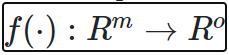 a partir de un set de entrenamiento. 

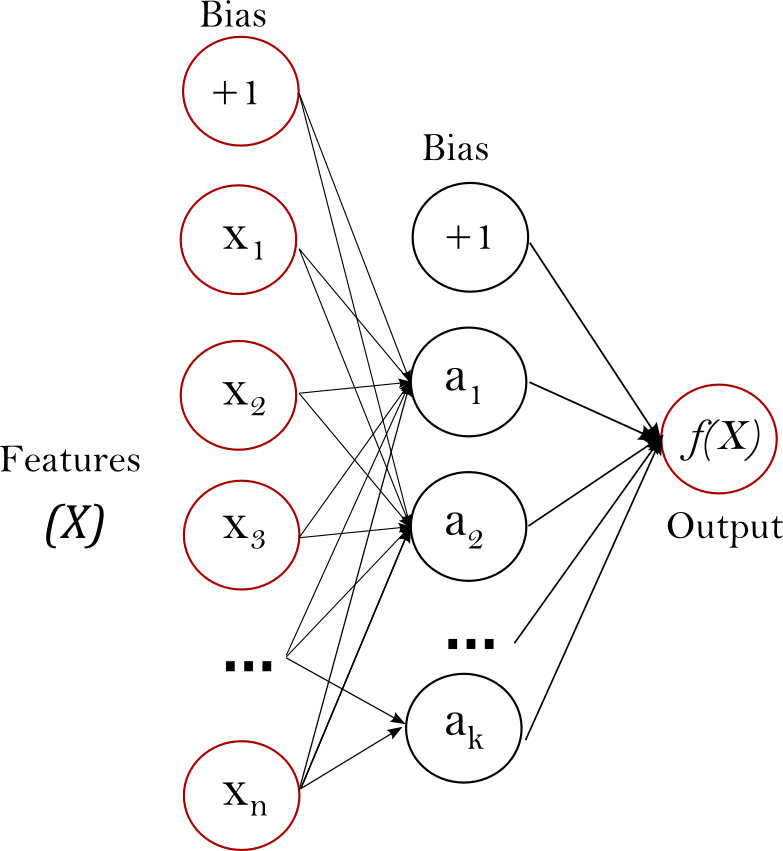

La capa de mas izquierda se conoce como la entrada y consiste en un set de neuronas que representan las caracteristicas de entrada. Las capas interiores se denominan capaz escondidas (hidden layers) y transforman las capas anteriores mediante una suma con pesos.

## Hiperparámetros.
La Redes Neuronales (NN) utilizan los siguientes hiperparámetros:



*   Hidden Layer Size
*   Hidden Layer Activation
*   Batch Size
*   Learning Rate.
*   alpha
   



## Por qué es util?



*   Puede aprender modelos no lineales.
*   Puede aprender modelos en tiempo real.






Ejemplo: Tomado de https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

clf.score(X_test, y_test)

0.88

El ejemplo se incluye en la seccion [Redes Neuronales](https://colab.research.google.com/drive/17yg2aFC4bePYDTkDgyRllIsmljlvp0ju?authuser=3#scrollTo=X1_Xq7ZbFi1a&line=3&uniqifier=1) en la que se obtiene un modelo para el problema a resolver.

# Aplicacion de modelos

Una nota curiosa antes de comenzar es que en un primer inicio se trabajó con valores sin normalizar y los resultados no fueron muy buenos. Ser volvio a normalizar los datos y se obtuvieron resultados mas aceptables.

Comencemos por dividir los datos en un set de entrenamiento y en un set de prueba.

Se utilizará 70% Training 30% Test. aleatoriamente.

In [55]:
from sklearn.model_selection import train_test_split
y = arrhythmia_data_balanced['Class'].to_numpy()
X = arrhythmia_data_balanced.drop(columns = ['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Logistic Regresion

Se escoge la regression logistica debido a que la misma mide la relacion entre variables categoricamente dependientes, en nuestro caso, el cuerpo humano tiene multiples variables que se relacionan entre si.

Declarando el modelo de Regresion Logistica y utilizando grid search y validacion cruzada

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid={"C":np.linspace(0.1,3,15)}# l1 lasso l2 ridge

logreg = LogisticRegression(max_iter = 10000)
logreg_cv=GridSearchCV(logreg,grid, cv =5)
logreg_cv.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1       , 0.30714286, 0.51428571, 0.72142857, 0.92857143,
       1.13571429, 1.34285714, 1.55      , 1.75714286, 1.96428571,
       2.17142857, 2.37857143, 2.58571429, 2.79285714, 3.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
print(logreg_cv.score(X_test, y_test))
print(logreg_cv.best_params_)

0.6219512195121951
{'C': 0.7214285714285714}


In [64]:
log_reg_pred = logreg_cv.predict(X_test)
log_reg_pred

array([ 1,  2, 10, 16,  2,  2,  1,  1, 10,  4,  2, 10,  2,  1, 10,  1, 10,
        6,  2,  1,  1, 10,  1,  1,  1,  2, 16,  1, 10,  4, 10, 16,  2, 10,
       16, 10,  2,  1,  4,  1,  3, 16,  1,  1, 10,  3, 10, 10,  4,  6,  1,
       10,  1,  1, 10,  4, 16, 10, 10, 10,  1, 16, 10,  2,  1,  1, 10, 16,
        1,  1,  1, 10,  5, 10,  1,  1,  1, 10,  3,  1,  2,  3])

### Balanced Accuracy.

In [65]:
from sklearn.metrics import balanced_accuracy_score
log_reg_ba = balanced_accuracy_score(y_test, log_reg_pred)
log_reg_ba

0.5689336978810663

### Cohen Kappa

In [66]:
from sklearn.metrics import cohen_kappa_score
log_reg_ck = cohen_kappa_score(y_test, log_reg_pred)
log_reg_ck

0.5415689810640216

### Matriz de confusion

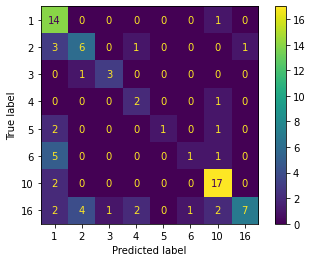

In [67]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg_cv, X_test, y_test)

### Hinge loss

In [68]:
from sklearn.metrics import hinge_loss
pred_decision = logreg_cv.decision_function(X_test)
log_reg_hl = hinge_loss(y_test, pred_decision)
log_reg_hl

0.9371325986651411

### Matthews correlation coefficient

In [69]:
from sklearn.metrics import matthews_corrcoef
log_reg_mcc = matthews_corrcoef(y_test, log_reg_pred)
log_reg_mcc

0.5592665584774914

### ROC AUC

In [70]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, logreg_cv.predict_proba(X_test), multi_class='ovr')

0.8969667709311436

## k Nearest Neighbors

Se plantea hacer una aproximacion por K Nearest Neighbors dao a la simplicidad de implementacion y la entrega de buenos resultados sin muchos ajustes. Sin embargo, se entiende que no da buenos resultados cuando hay muchos "features" pero se quiere usar para una comparación.

In [91]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
grid={"n_neighbors":np.arange(1,40,1)}
neigh_cv = GridSearchCV(neigh,grid, cv =5)
neigh_cv.fit(X_train,y_train)
neigh_pred = neigh_cv.predict(X_test)

In [92]:
print(neigh_cv.best_params_)
print(neigh_cv.score(X_test,y_test))

{'n_neighbors': 8}
0.36585365853658536


### Balanced Accuracy.

In [93]:
from sklearn.metrics import balanced_accuracy_score
neigh_ba = balanced_accuracy_score(y_test, neigh_pred)
neigh_ba

0.3479864433811802

### Cohen Kappa

In [94]:
from sklearn.metrics import balanced_accuracy_score
neigh_ck = cohen_kappa_score(y_test, neigh_pred)
neigh_ck

0.23529411764705888

### Matriz de confusion

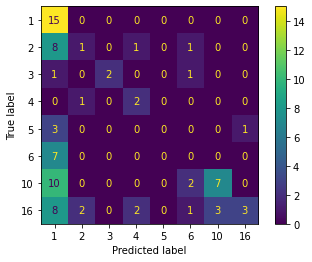

In [95]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(neigh_cv, X_test, y_test)

### Hinge loss

kNN no posee funcion de decision por lo que no se puede calcular el hinge loss

### Matthews correlation coefficient

In [105]:
from sklearn.metrics import matthews_corrcoef
neigh_mcc = matthews_corrcoef(y_test, neigh_pred)
neigh_mcc

0.284011666243716

### ROC AUC

In [97]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, neigh_cv.predict_proba(X_test), multi_class='ovr')

0.7825768965442597



## Gaussian Naive Bayes

Se escoge Gaussian Naive Bayes dado que nuestro set de datos tiene muchas dimensiones (Mas de 200 columnas) y el modelo esta especializado para ello.

In [99]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
grid= {'var_smoothing': np.logspace(0,-9, num=100)}
gnb_cv = GridSearchCV(gnb,grid, cv =5)
gnb_cv.fit(X_train,y_train)
gnb_pred = gnb_cv.predict(X_test)

In [100]:
print(gnb_cv.best_params_)
print(gnb_cv.score(X_test,y_test))

{'var_smoothing': 0.0023101297000831605}
0.4146341463414634


### Balanced Accuracy.

In [101]:
from sklearn.metrics import balanced_accuracy_score
gnb_ba = balanced_accuracy_score(y_test, gnb_pred)
gnb_ba

0.40968614718614715

### Cohen Kappa

In [102]:
from sklearn.metrics import balanced_accuracy_score
gnb_ck = cohen_kappa_score(y_test, gnb_pred)
gnb_ck

0.3111655582779139

### Matriz de confusion

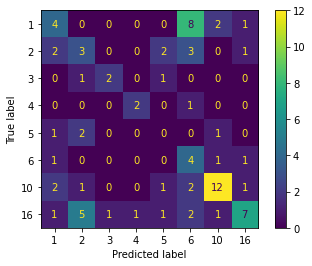

In [103]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb_cv, X_test, y_test)

### Hinge loss

GNB no posee funcion de decision por lo que no se puede calcular el hinge loss


### Matthews correlation coefficient

In [104]:
from sklearn.metrics import matthews_corrcoef
gnb_mcc = matthews_corrcoef(y_test, gnb_pred)
gnb_mcc

0.31829777950322835

### ROC AUC

In [106]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, gnb_cv.predict_proba(X_test), multi_class='ovr')

0.7210018810450497



## Kernel SVC

Se escoge SVC ya que normalmente tienen un buen desempeño para la mayoria de los conjuntos de datos y se adaptan bien a muchas dimensiones como la de nuestros modelos. Ademas de ello, dado que los datos le realizamos un buen preprocesamiento puede darnos mejores resultados.

In [127]:
from sklearn.svm import SVC
svc = SVC(probability =  True)
grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf','poly','sigmoid'], 'degree': [2,3,4,5,6,7]}
svc_cv = GridSearchCV(svc,grid, cv =5)
svc_cv.fit(X_train,y_train)
svc_pred = svc_cv.predict(X_test)

In [128]:
print(svc_cv.best_params_)
print(svc_cv.score(X_test,y_test))

{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
0.5853658536585366


### Balanced Accuracy.

In [129]:
from sklearn.metrics import balanced_accuracy_score
svc_ba = balanced_accuracy_score(y_test, svc_pred)
svc_ba

0.5617509683299157

### Cohen Kappa

In [130]:
from sklearn.metrics import balanced_accuracy_score
svc_ck = cohen_kappa_score(y_test, svc_pred)
svc_ck

0.5014306151645208

### Matriz de confusion

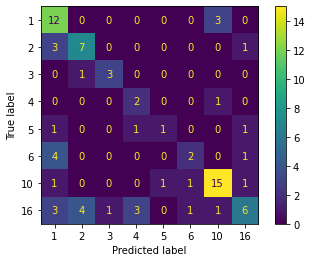

In [131]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc_cv, X_test, y_test)

### Hinge loss

In [132]:
from sklearn.metrics import hinge_loss
pred_decision = svc_cv.decision_function(X_test)
svc_hl = hinge_loss(y_test, pred_decision)
svc_hl

1.2830519415789459


### Matthews correlation coefficient

In [133]:
from sklearn.metrics import matthews_corrcoef
svc_mcc = matthews_corrcoef(y_test, svc_pred)
svc_mcc

0.5099487454112868

### ROC AUC

In [134]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, svc_cv.predict_proba(X_test), multi_class='ovr')

0.9071469834183402



## Redes Neuronales

Se ecoge las redes neuronales debido a su habilidad de poder aprender modelos no lineales ademas de que permite aprender modelos en tiempo real. Al ser una aplicacion medica resulta util dado que las muestras continuarán llegando.

In [144]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50),(10,30,10),(20,),(100,)],
    'activation': ['identity','logistic','tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [0.0001,0.001, 0.05],
    'learning_rate': ['invscaling','constant','adaptive']
}
mlp_cv = GridSearchCV(mlp,grid, cv =5)
mlp_cv.fit(X_train,y_train)
mlp_pred = mlp_cv.predict(X_test)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sk

In [145]:
print(mlp_cv.best_params_)
print(mlp_cv.score(X_test,y_test))

{'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.6097560975609756


### Balanced Accuracy.

In [146]:
from sklearn.metrics import balanced_accuracy_score
mlp_ba = balanced_accuracy_score(y_test, mlp_pred)
mlp_ba

0.5376836978810663

### Cohen Kappa

In [147]:
from sklearn.metrics import balanced_accuracy_score
mlp_ck = cohen_kappa_score(y_test, mlp_pred)
mlp_ck

0.5228223313329696

### Matriz de confusion

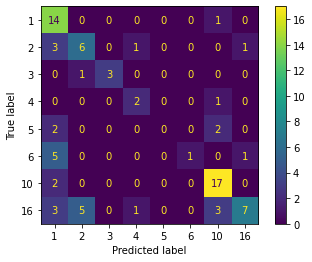

In [148]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_cv, X_test, y_test)

### Hinge loss


### Matthews correlation coefficient

In [150]:
from sklearn.metrics import matthews_corrcoef
mlp_mcc = matthews_corrcoef(y_test, mlp_pred)
mlp_mcc

0.5419543610867927

### ROC AUC

In [151]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, mlp_cv.predict_proba(X_test), multi_class='ovr')

0.8959506984251056

# Resultados y análisis

Se obtuvieron modelos optimos de aprendizaja automatico utilizando por medio del metodo de Grid CV. Los modelos optimos encontrados fueron: Logistic Regresion, k Nearest Neighbors, Gaussian Naive Bayes, Kernel SVC y Redes Neuronales. A cada uno de ellos se les midieron metricas de Balanced Accuracy, Cohen's Kappa, Matriz de confusión, Matthews correlation coefficient y ROC AUC. La tabla a continuacion representa un resumen de los resultados.

| Nombre del modelo | Balanced Accuracy| Cohen Kappa| Hinge loss | Matthews correlation coefficient | ROC AUC |
| --- | --- | --- | --- | --- | --- | 
| Logistic Regression | **0.5689** | **0.5416** |**0.9371** |**0.5593** | 0.8970 |
| k Nearest Neighbors | **0.3480** | **0.2353** | NA | **0.2840** | 0.7826 |
| Gaussian Naive Bayes | 0.4097 |  0.3112| NA | 0.3183 | **0.7210** |
| Kernel SVC | 0.5618 | 0.5014 | **1.283** | 0.5099 | **0.9071** |
| Redes Neuronales | 0.5377 | 0.5228 | NA | 0.5420 | 0.8960 |

De acuerdo a la tabla podemos notar que el modelo generado a partir del Logistic Regression nos produce el mejor resultado a excepción del ROC AUC,para el cual se tiene que el mejor es el modelo de Kernel SVC. Aun nos falta una metrica por estudiar, la Matriz de confusion que se expresa a continuación:

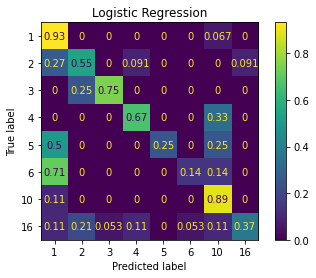

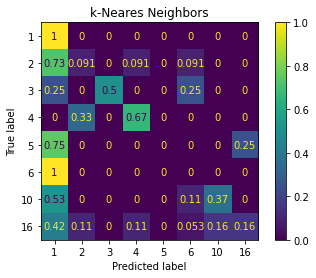

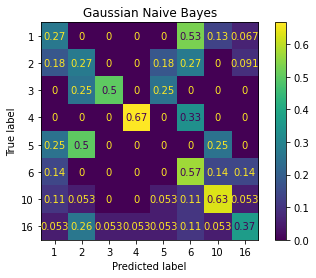

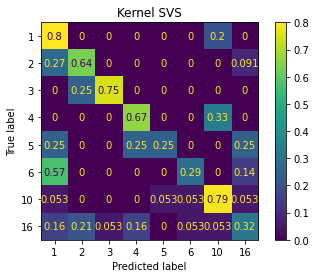

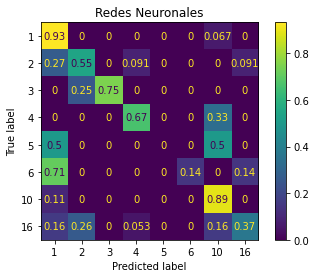

In [160]:

plot_confusion_matrix(logreg_cv, X_test, y_test, normalize ='true')
plt.title("Logistic Regression")
plt.show()

plot_confusion_matrix(neigh_cv, X_test, y_test,normalize ='true')
plt.title("k-Neares Neighbors")
plt.show()

plot_confusion_matrix(gnb_cv, X_test, y_test,normalize ='true')
plt.title("Gaussian Naive Bayes")
plt.show()

plot_confusion_matrix(svc_cv, X_test, y_test,normalize ='true')
plt.title("Kernel SVS")
plt.show()

plot_confusion_matrix(mlp_cv, X_test, y_test,normalize ='true')
plt.title("Redes Neuronales")
plt.show()

Comencemos la observación notando cual de los modelos logran de mejor manera detectar un electrocardiograma sano, dado un paciente sano y cuales de ellos diagnostican un electrocardiograma sano dado un paciente enfermo.

En primer lugar podemos ver que el k-Neares-Neighbors logra detectar un 100% de los casos de electrocardiograma sano, sin embargo al mirar que el modelo tambien clasifica como saludable un 73% de los pacientes de clase 2, 25% de los clase 3, 75% de los clase 6, 100% de los clase 6, 53% de los clase 10 y 42% de otras patologias. Esto hace que este modelo no sea el mejor para poder diferenciar entra pacientes sanos y pacientes con alguna patología cardiaca.

Seguidamente podemos notar que los modelos de Logistic Regression y redes neuronales ambos tienen 93% de deteccion de pacientes sanos dado que el paciente estaba sano. 

Ante una inspeccion mas a fondo, se puede notar que los modelos se comportan de manera muy similar. Para los falsos positivos de electrocardiogramas sanos la unica diferencia es que para el caso de la Red Neuronal se predijeron erroneamenta 16% de los pacientes con otras patologías, mientras que para el caso de Logistic Regression se predijeron erroneamente 11% de los pacientes con otras patologías, haciendo el modelo de Logistic Regression ligeramente superior al de Redes Neuronales para el caso de detección de enfermedad cardiaca o no.

Es por esto que basados en las metricas y en las matrices de confusion se escoge el modelo de **Logistic Regression** como el modelo que mejor soluciona el problema de clasificacion.

Sin embargo, es importante saber que dependiendo de que problema se quiera resolver otros modelos pueden tener un mejor desempeño.